In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
#import squarify

### load and clean recent_grads and grad_students datasets

In [2]:
# recent_grads
recent_grads = pd.read_csv('data/recent-grads.csv')

to_drop = ['Rank','Full_time_year_round', 'Unemployment_rate','ShareWomen', 'P25th','P75th',
           'Sample_size']
recent_grads.drop(to_drop, axis=1, inplace=True)
recent_grads['Major_code'] = recent_grads['Major_code'].apply(str)

recent_grads.dropna(subset = ['Total'], inplace=True)
recent_grads.isna().sum()
recent_grads.astype({'Total': 'int64', 'Men': 'int64', 'Women': 'int64'}).dtypes

recent_grads = recent_grads.rename(columns={'Median': 'Median_income'})

# Convert major name to title case
recent_grads['Major'] = recent_grads['Major'].str.title()

# Get short names of majors
recent_grads['Total'] = recent_grads['Total'].apply(np.int64)
recent_grads['Men'] = recent_grads['Men'].apply(np.int64)
recent_grads['Women'] = recent_grads['Women'].apply(np.int64)
major_list = pd.read_csv('data/major_short_names.csv')
recent_grads = pd.merge(major_list, recent_grads, how='right')
recent_grads.rename(columns={'Major':'Major_long', 'Major_short':'Major', 'Low_wage_jobs':'income: low-wage'}, inplace=True)
recent_grads['income: other'] = recent_grads['Employed'] - recent_grads['income: low-wage']

In [3]:
recent_grads.head()

,Major_category,Major_long,Major,Major_code,Total,Men,Women,Employed,Full_time,Part_time,Unemployed,Median_income,College_jobs,Non_college_jobs,income: low-wage,income: other
0,Engineering,Petroleum Engineering,Petroleum Eng.,2419,2339,2057,282,1976,1849,270,37,110000,1534,364,193,1783
1,Engineering,Mining And Mineral Engineering,Mining & Mineral Eng.,2416,756,679,77,640,556,170,85,75000,350,257,50,590
2,Engineering,Metallurgical Engineering,Metallurgical Eng.,2415,856,725,131,648,558,133,16,73000,456,176,0,648
3,Engineering,Naval Architecture And Marine Engineering,Naval Architecture & Marine Eng.,2417,1258,1123,135,758,1069,150,40,70000,529,102,0,758
4,Engineering,Chemical Engineering,Chemical Eng.,2405,32260,21239,11021,25694,23170,5180,1672,65000,18314,4440,972,24722


In [4]:
grad_students = pd.read_csv('data/grad-students.csv')

In [5]:
grad_students.columns

Index(['Major_code', 'Major', 'Major_category', 'Grad_total',
       'Grad_sample_size', 'Grad_employed', 'Grad_full_time_year_round',
       'Grad_unemployed', 'Grad_unemployment_rate', 'Grad_median', 'Grad_P25',
       'Grad_P75', 'Nongrad_total', 'Nongrad_employed',
       'Nongrad_full_time_year_round', 'Nongrad_unemployed',
       'Nongrad_unemployment_rate', 'Nongrad_median', 'Nongrad_P25',
       'Nongrad_P75', 'Grad_share', 'Grad_premium'],
      dtype='object')

In [6]:
to_drop = ['Major_code', 'Grad_sample_size', 'Grad_P25', 'Grad_P75',  'Nongrad_P25', 'Nongrad_P75', 'Grad_share', 'Grad_premium', 'Nongrad_full_time_year_round']
grad_students.drop(to_drop, axis=1, inplace=True)
grad_students.isna().sum()

Major                        0
Major_category               0
Grad_total                   0
Grad_employed                0
Grad_full_time_year_round    0
Grad_unemployed              0
Grad_unemployment_rate       0
Grad_median                  0
Nongrad_total                0
Nongrad_employed             0
Nongrad_unemployed           0
Nongrad_unemployment_rate    0
Nongrad_median               0
dtype: int64

In [7]:
grad_students.rename(columns={ 'Grad_full_time_year_round': 'Grad_full_time','Nongrad_employed':'Grad_non_college_jobs', 'Grad_median':'Grad_median_income'}, inplace=True)
grad_students['Grad_part_time'] = grad_students['Grad_employed'] - grad_students['Grad_full_time']
grad_students['Grad_median_income'] = grad_students['Grad_median_income'].apply(np.int64)
grad_students.head()

,Major,Major_category,Grad_total,Grad_employed,Grad_full_time,Grad_unemployed,Grad_unemployment_rate,Grad_median_income,Nongrad_total,Grad_non_college_jobs,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Grad_part_time
0,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,7098,6511,681,0.087543,75000,86062,73607,3928,0.050661,65000.0,587
1,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,40492,29553,2482,0.057756,60000,461977,347166,25484,0.068386,48000.0,10939
2,HOSPITALITY MANAGEMENT,Business,24417,18368,14784,1465,0.073867,65000,179335,145597,7409,0.048423,50000.0,3584
3,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,3590,2701,316,0.080901,47000,37575,29738,1661,0.052900,41600.0,889
4,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,7512,5622,466,0.058411,57000,53819,43163,3389,0.072800,52000.0,1890


### pivot tables for visualizations

#### recent_grads

In [8]:
recent_grads['Percent_employed'] = recent_grads['Employed'] / (recent_grads['Employed'] + recent_grads['Unemployed'])
recent_grads['Percent_college_jobs'] = recent_grads['College_jobs'] / (recent_grads['College_jobs'] + recent_grads['Non_college_jobs'])
recent_grads['Percent_non_college_jobs'] = recent_grads['Non_college_jobs'] / (recent_grads['College_jobs'] + recent_grads['Non_college_jobs'])
recent_grads['Total_income'] = recent_grads['Median_income'] * recent_grads['Full_time']
recent_grads['Percent_low_wage_jobs'] = recent_grads['income: low-wage'] / (recent_grads['College_jobs'] + recent_grads['Non_college_jobs'] + recent_grads['income: low-wage'])
recent_grads.head()

,Major_category,Major_long,Major,Major_code,Total,Men,Women,Employed,Full_time,Part_time,...,Median_income,College_jobs,Non_college_jobs,income: low-wage,income: other,Percent_employed,Percent_college_jobs,Percent_non_college_jobs,Total_income,Percent_low_wage_jobs
0,Engineering,Petroleum Engineering,Petroleum Eng.,2419,2339,2057,282,1976,1849,270,...,110000,1534,364,193,1783,0.981619,0.808219,0.191781,203390000,0.092300
1,Engineering,Mining And Mineral Engineering,Mining & Mineral Eng.,2416,756,679,77,640,556,170,...,75000,350,257,50,590,0.882759,0.576606,0.423394,41700000,0.076104
2,Engineering,Metallurgical Engineering,Metallurgical Eng.,2415,856,725,131,648,558,133,...,73000,456,176,0,648,0.975904,0.721519,0.278481,40734000,0.000000
3,Engineering,Naval Architecture And Marine Engineering,Naval Architecture & Marine Eng.,2417,1258,1123,135,758,1069,150,...,70000,529,102,0,758,0.949875,0.838352,0.161648,74830000,0.000000
4,Engineering,Chemical Engineering,Chemical Eng.,2405,32260,21239,11021,25694,23170,5180,...,65000,18314,4440,972,24722,0.938902,0.804869,0.195131,1506050000,0.040968


In [9]:
df_cat = recent_grads.groupby('Major_category').agg({'Median_income': 'mean', 'Total': 'sum', 'Men': 'sum', 'Women': 'sum',
                    'Employed': 'sum', 'Unemployed': 'sum', 'Full_time': 'sum', 'College_jobs': 'sum',
                    'Non_college_jobs': 'sum', 'income: low-wage': 'sum'})
df_cat.reset_index(level=0, inplace=True)

# See note above about the approximation of median income by category
#df_cat['Median_income'] = round(df_cat['Median_income'] / df_cat['Full_time'])
df_cat['Percent_employed'] = (df_cat['Employed'] / (df_cat['Employed'] + df_cat['Unemployed']))*100
df_cat['Percent_unemployed'] = (df_cat['Unemployed'] / (df_cat['Employed'] + df_cat['Unemployed']))*100
df_cat['Percent_men'] = (df_cat['Men'] / (df_cat['Men'] + df_cat['Women']))*100
df_cat['Percent_women'] = (df_cat['Women'] / (df_cat['Men'] + df_cat['Women']))*100
df_cat['Percent_college_jobs'] = (df_cat['College_jobs'] / (df_cat['College_jobs'] + df_cat['Non_college_jobs']))*100
df_cat['Percent_non_college_jobs'] = (df_cat['Non_college_jobs'] / (df_cat['College_jobs'] + df_cat['Non_college_jobs']))*100
df_cat['Percent_low_wage_jobs'] = df_cat['income: low-wage'] / (df_cat['College_jobs'] + df_cat['Non_college_jobs'] + df_cat['income: low-wage'])
df_cat.head()

,Major_category,Median_income,Total,Men,Women,Employed,Unemployed,Full_time,College_jobs,Non_college_jobs,income: low-wage,Percent_employed,Percent_unemployed,Percent_men,Percent_women,Percent_college_jobs,Percent_non_college_jobs,Percent_low_wage_jobs
0,Agriculture & Natural Resources,35111.111111,75620,40357,35263,63794,3486,55585,18677,33217,7414,94.818668,5.181332,53.368157,46.631843,35.990673,64.009327,0.125008
1,Arts,33062.500000,357130,134390,222740,288114,28228,207773,94785,163720,60116,91.076746,8.923254,37.630555,62.369445,36.666602,63.333398,0.188676
2,Biology & Life Science,36421.428571,453862,184919,268943,302797,22854,240377,151233,127182,42742,92.982057,7.017943,40.743442,59.256558,54.319272,45.680728,0.133088
3,Business,43538.461538,1302376,667852,634524,1088742,79877,988870,148538,496570,126788,93.164838,6.835162,51.279508,48.720492,23.025292,76.974708,0.164255
4,Communications & Journalism,34500.000000,392601,131921,260680,330660,26852,273330,86556,172992,49595,92.489203,7.510797,33.601799,66.398201,33.348745,66.651255,0.160427


### visualizations

<ol>
<li>gendered violin plot by income</li>
<li>layered bar chart income vs major category, legend: undergraduates, graduates</li> 
<li>dual-histograms for categories with large income change</li> 
<li>total students vs income (popularity/income correlation)</li>
<li>stand-out individual majors (outliers within categories)</li>
<li>income vs employment type (display risk/reward tradeoff)</li>
<li>category/major gender charts (distribution for categories)</li>
</ul>

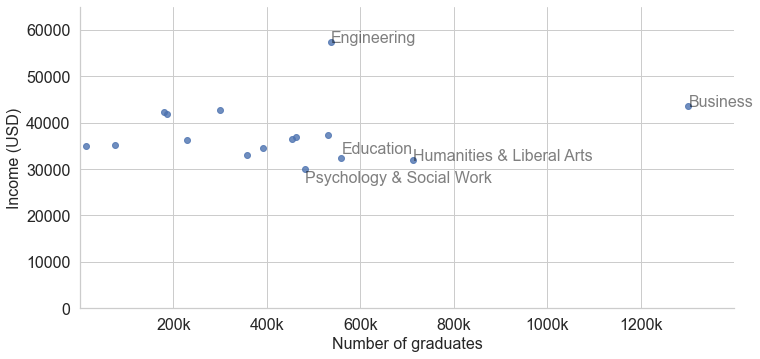

In [30]:
# Income vs Popularity
sns.set(style='whitegrid')
bar1 = sns.lmplot(y='Median_income',
                  x='Total',
                  data=df_cat,
                  fit_reg=False,
                  height=5,
                  aspect=2
                  )

def label_point(variable, value, x_offset=0, y_offset=0):
    plt.text(df_cat.Total[df_cat[variable]==value] + x_offset,
             df_cat.Median_income[df_cat[variable]==value] + y_offset,
             value, 
             fontdict=dict(color='black', alpha=0.5, size=16))

label_point('Major_category', 'Business')
label_point('Major_category', 'Engineering')

label_point('Major_category', 'Education', y_offset=+1000)
label_point('Major_category', 'Psychology & Social Work', y_offset=-3000)
label_point('Major_category', 'Humanities & Liberal Arts')

#plt.title('Income by Popularity', fontsize=16)
plt.ylabel("Income (USD)", fontsize=16)
plt.ylim(0, 65000)

plt.xlabel("Number of graduates", fontsize=16)
plt.xlim(0, 1400000)
plt.xticks([2e5, 4e5, 6e5, 8e5, 10e5, 12e5], ['200k', '400k', '600k', '800k', '1000k', '1200k'])
plt.tick_params(labelsize=16)
plt.show()

In [45]:

# Transpose to create two rows (one per gender) for each major category
df_cat_gender = pd.melt(df_cat.drop(columns='Total').rename(columns={'Major_category':'Cat'}),
                        id_vars=['Cat', 'Median_income', 'Percent_women'], value_vars=['Men', 'Women'],
                        var_name='Gender', value_name='Total')
df_cat_gender.sort_values(['Percent_women', 'Cat', 'Gender'], ascending=[True, True, True], inplace=True)
df_cat_gender.head()

# Abbreviated category name
df_cat_gender['C'] = df_cat_gender.Cat.str.upper().str[:8]

# Abbreviate 'Men' and 'Women'
for i in range(len(df_cat_gender)):
    if df_cat_gender.loc[i,'Gender'] == 'Men':
        df_cat_gender.loc[i,'Gender'] = 'M'
    elif df_cat_gender.loc[i,'Gender'] == 'Women':
        df_cat_gender.loc[i,'Gender'] = 'W'        

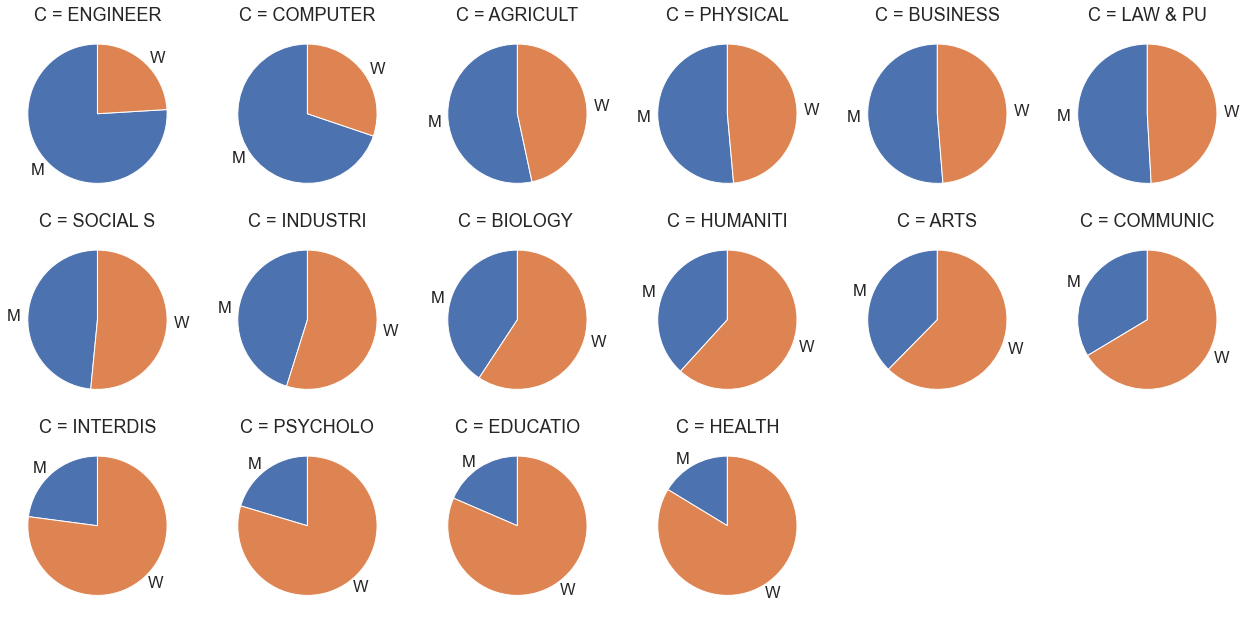

In [46]:
# Array of pie charts, one chart per category
# Each pie shows percent of female vs male graduates
def pie(v, l, color=None):
    plt.pie(v, labels=l.values, startangle=90)

    
sns.set(font_scale=1.5)
g = sns.FacetGrid(df_cat_gender, col="C", col_wrap=6)
g.map(pie, 'Total', 'Gender')
g.set_axis_labels("", "")
plt.show()

In [48]:
# Experimental: Donut instead of pies

# colors
colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']
df_cat_gender_arts = df_cat_gender[df_cat_gender.Major_category=='Arts']
# Pie Chart
plt.pie(df_cat_gender_arts.Total, colors=colors, labels=df_cat_gender_arts.Gender,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=(0.05, 0.05))
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Arts')
plt.show()

AttributeError: module 'seaborn' has no attribute 'pie'

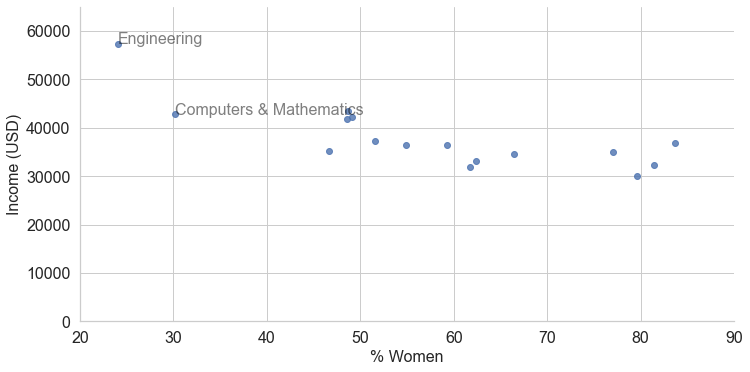

In [34]:
# Income vs Percent of women
sns.set(style='whitegrid')
bar1 = sns.lmplot(y='Median_income',
                  x='Percent_women',
                  data=df_cat,
                  fit_reg=False,
                  height=5,
                  aspect=2
                  )

def label_point(variable, value):
    plt.text(df_cat.Percent_women[df_cat[variable]==value], df_cat.Median_income[df_cat[variable]==value], value, 
        fontdict=dict(color='black', alpha=0.5, size=16))

label_point('Major_category', 'Engineering')
label_point('Major_category', 'Computers & Mathematics')

#plt.title('Income by % Women', fontsize=16)
plt.tick_params(labelsize=16)

plt.ylabel("Income (USD)", fontsize=16)
plt.ylim(0, 65000)

plt.xlabel("% Women", fontsize=16)
plt.xlim(20, 90)

plt.show()


In [ ]:
# Income vs % with job requiring college
sns.set_theme(style="white")
sns.relplot(x="Percent_college_jobs", y="Median_income", size="Total",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_cat)